In [ ]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("hello")

hello


In [9]:
from datasets import load_dataset

In [10]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [12]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

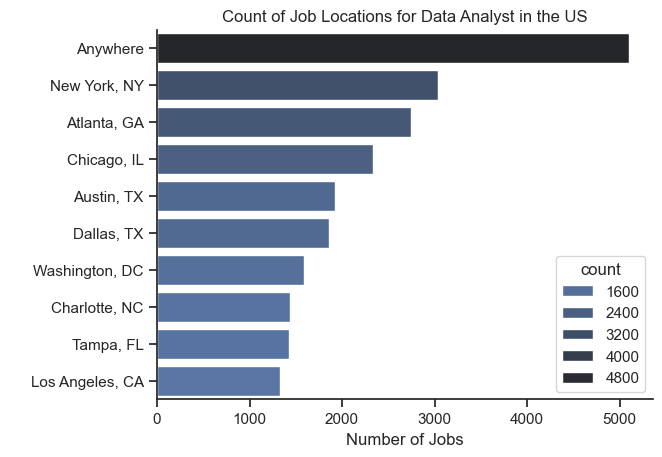

In [23]:
df_frame = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
sns.barplot(data = df_frame,x = 'count',y = 'job_location',hue = 'count',palette = 'dark:b_r')
sns.despine()
plt.title('Count of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()

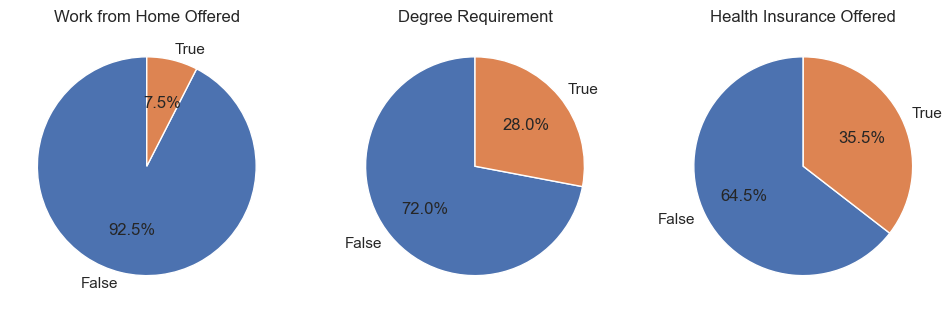

In [22]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig,ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),labels = ['False','True'],autopct ='%1.1f%%',startangle = 90)
    ax[i].set_title(title)

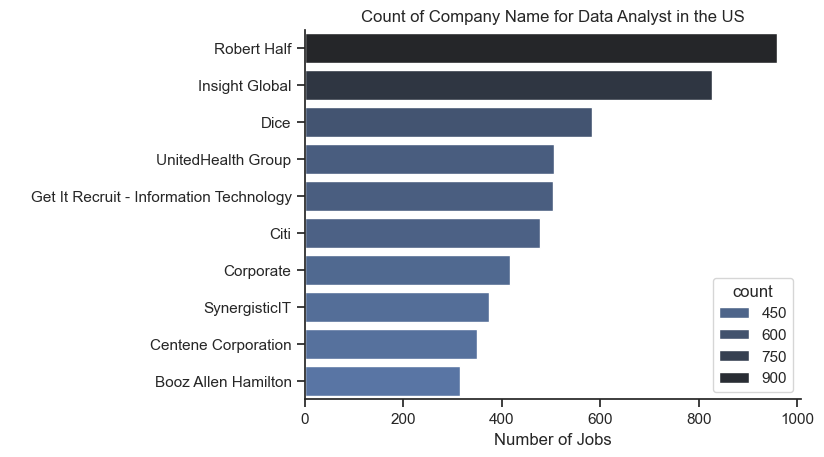

In [25]:
df_frame = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
sns.barplot(data = df_frame,x = 'count',y = 'company_name',hue = 'count',palette = 'dark:b_r')
sns.despine()
plt.title('Count of Company Name for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()